<a href="https://colab.research.google.com/github/Tanvir007/GAZIPUR-AIR-POLLUTION/blob/main/PM2_5_vs_NO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading Modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data science/PM25vsNO2.csv')
df.head

<bound method NDFrame.head of          PM25   NO2
0       69.29  8.46
1       79.08  6.06
2       82.03  2.84
3       82.66  3.26
4       71.83  5.15
...       ...   ...
80347  154.25   NaN
80348  151.17   NaN
80349  183.08   NaN
80350  159.19   NaN
80351  132.95   NaN

[80352 rows x 2 columns]>

In [3]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(df.duplicated().any()))
print('The total number of null values in each colum:')
display(df.isnull().sum())

Are there any duplicated values in our data ? : True

The total number of null values in each colum:


PM25    25085
NO2     41582
dtype: int64

In [4]:
# fill in the missing values with the mean of the particular column
df.fillna(value=df.mean(),inplace=True)

In [5]:
# let's check the data again if there are any missing values
df.isnull().any()

PM25    False
NO2     False
dtype: bool

In [6]:
df.describe()

,PM25,NO2
count,80352.000000,80352.000000
mean,92.151584,9.245389
std,69.722594,7.420471
min,0.020000,0.040000
25%,41.630000,5.990000
50%,92.151584,9.245389
75%,94.160000,9.245389
max,867.730000,180.150000


In [7]:
df.corr()

,PM25,NO2
PM25,1.000000,0.291163
NO2,0.291163,1.000000


<AxesSubplot:>

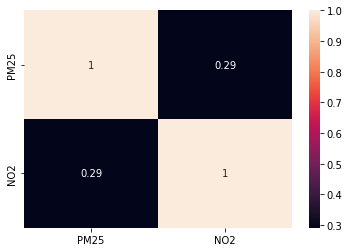

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
x = df.drop(['NO2'],axis = 1)

In [10]:
y = df.NO2

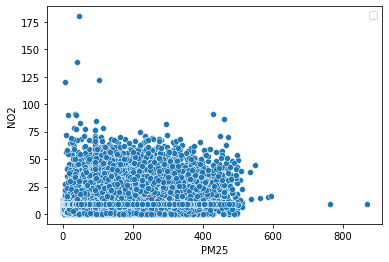

In [11]:
sns.scatterplot(x = df['PM25'], y = df['NO2']);
plt.legend()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

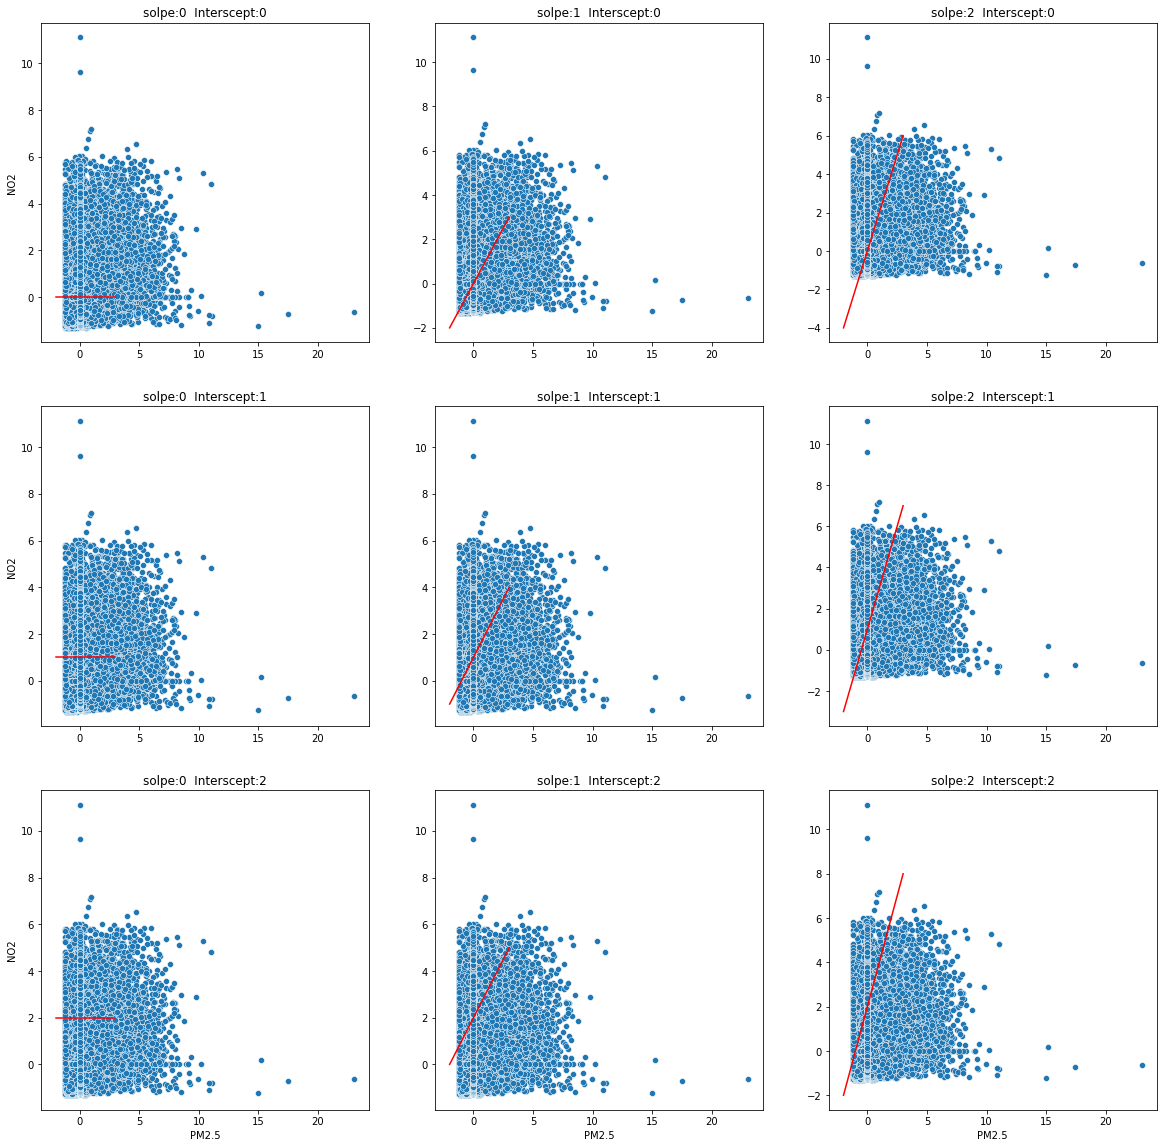

In [13]:
y_ = scaled_data.T[0]
x_ = scaled_data.T[1]
X = np.linspace(-2, 3, 100)
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i in range (0, 3):
    for j in range (0, 3):
        Y = j*X+i
        sns.scatterplot(ax=ax[i][j], x=x_, y=y_);
        sns.lineplot(ax=ax[i][j], x=X, y=Y, color='red');
        ax[i][j].set_title(f"solpe:{j}  Interscept:{i}")
        ax[i][0].set_ylabel( "NO2")
        ax[2][j].set_xlabel( "PM2.5")

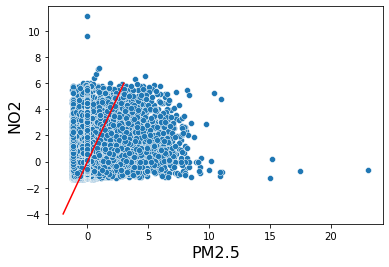

In [14]:
Y = 2*X+0
sns.scatterplot(x=x_, y=y_);
sns.lineplot(x=X, y=Y, color='red');
plt.xlabel("PM2.5", fontsize=16);
plt.ylabel("NO2", fontsize=16);

Text(-20, 40, 'Error')

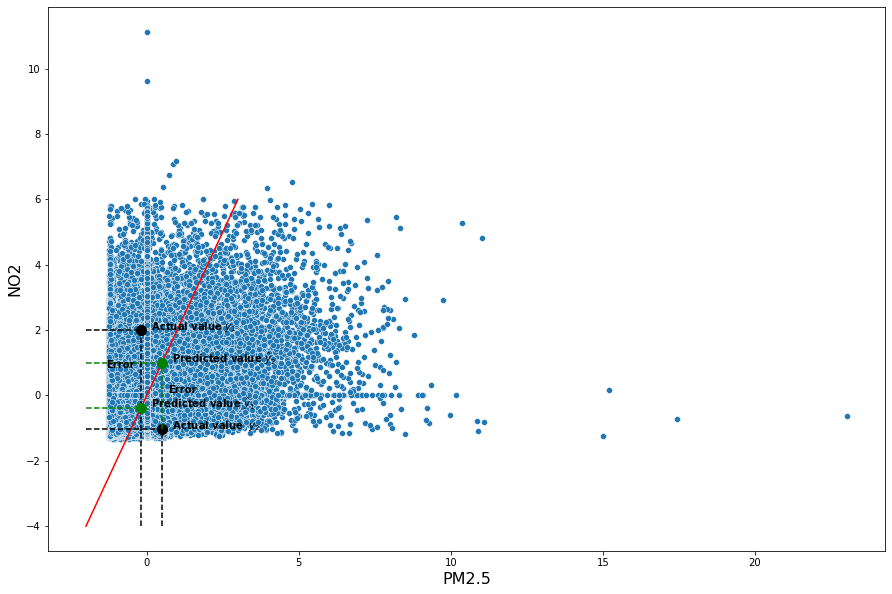

In [16]:
fig = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=x_, y=y_);
sns.lineplot(x=X, y=Y, color='red');
x1 = -0.1989432
y1 = 2 
x2 = 0.50000164
y2 = -1.02679815
plt.plot(x1, y1, c='black',  marker='.', markersize=20);
plt.plot(x2, y2, c='black',  marker='.', markersize=20);

plt.vlines(x2, -4, y2, linestyle="dashed", colors='black');
plt.hlines(y2, -2, x2, linestyle="dashed", colors='black');

plt.vlines(x1, -4, y1, linestyle="dashed", colors='black');
plt.hlines(y1, -2, x1, linestyle="dashed", colors='black');

y_1hat = 2*x1+0
y_2hat = 2*x2+0

plt.vlines(x2, y2, y_2hat, linestyle="dashed", colors='green');
plt.hlines(y_2hat, -2, x2, linestyle="dashed", colors='green');
plt.plot(x2, y_2hat,  marker='.', markersize=20, c='green');
plt.annotate("   Actual value $\ y_2$", (x2, y2), weight="bold")
plt.annotate("   Predicted value $ \hat y_2$", (x2, y_2hat), weight="bold")
plt.annotate("Error", (x2,y_2hat), textcoords="offset points", xytext=(20,-30), ha='center', weight="bold")

plt.hlines(y_1hat, -2, x1, linestyle="dashed", colors='green');
plt.plot(x1, y_1hat, c='green', marker='.', markersize=20);
plt.xlabel("PM2.5", fontsize=16);
plt.ylabel("NO2", fontsize=16);
plt.annotate("   Actual value$\ y_1$", (x1, y1),weight="bold")
plt.annotate("   Predicted value $ \hat y_1$", (x1, y_1hat), weight="bold")
plt.annotate("Error", (x1,y_1hat), textcoords="offset points", xytext=(-20,40), ha='center', weight="bold")